In [41]:
import pandas as pd
import numpy as np
import zipfile
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
!kaggle datasets download -d fahmidachowdhury/e-commerce-sales-analysis

/Users/mac/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Dataset URL: https://www.kaggle.com/datasets/fahmidachowdhury/e-commerce-sales-analysis
License(s): Attribution 4.0 International (CC BY 4.0)
e-commerce-sales-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
zipfile_name = 'e-commerce-sales-analysis.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [44]:
E_commerce = pd.read_csv("ecommerce_sales_analysis.csv")

Case #1
- The Board want to see the count of products in each category, the average review, the count of review, and the sales performance based on the catogory of the products.
- Visualize it using bar graph and analyse the result.

In [45]:
#Data Exploration
E_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [46]:
E_commerce.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


In [47]:
E_commerce

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


In [48]:
#Transforming the initial data according to the category.
sales_by_category = E_commerce.groupby('category')


In [49]:
product_counts = sales_by_category['product_id'].nunique().reset_index(name='product_count')
product_counts

,category,product_count
0,Books,154
1,Clothing,140
2,Electronics,138
3,Health,139
4,Home & Kitchen,125
5,Sports,153
6,Toys,151


/var/folders/5m/cy8ky4ms053gq47j9tbh5t3w0000gn/T/ipykernel_2225/2689079242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=E_commerce,y='category', palette="Set3", saturation =3).set_title('Product Count')


Text(0.5, 1.0, 'Product Count')

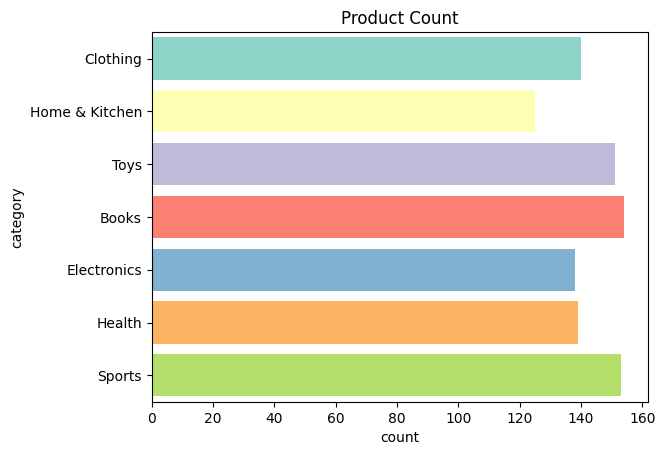

In [50]:
#Plotting the count of products on eeach category
sns.countplot(data=E_commerce,y='category', palette="Set3", saturation =3).set_title('Product Count')

In [51]:
average_review = sales_by_category['review_score'].mean().reset_index(name='average_review')
average_review

,category,average_review
0,Books,3.096753
1,Clothing,2.952143
2,Electronics,3.143478
3,Health,3.005036
4,Home & Kitchen,3.035200
5,Sports,3.091503
6,Toys,2.870861


In [52]:
total_review = sales_by_category['review_count'].sum().reset_index(name='total_review')
total_review

,category,total_review
0,Books,79263
1,Clothing,70347
2,Electronics,73862
3,Health,72398
4,Home & Kitchen,67735
5,Sports,83726
6,Toys,79175


In [53]:
#Summing the sales in each month for different categories
sales_column = [f'sales_month_{i}' for i in range(1,13)]
monthly_sales = sales_by_category[sales_column].sum().reset_index()
monthly_sales

,category,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
1,Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
2,Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
3,Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
4,Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
5,Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
6,Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [54]:
#Changing the name of the column
sales_dictionary = {'sales_month_1':'january_sales', 'sales_month_2':'february_sales', 'sales_month_3':'march_sales', 'sales_month_4':'april_sales', 
 'sales_month_5':'may_sales', 'sales_month_6':'june_sales', 'sales_month_7':'july_sales', 'sales_month_8':'august_sales', 
 'sales_month_9':'september_sales', 'sales_month_10':'october_sales', 'sales_month_11':'november_sales', 'sales_month_12':'december_sales'}
monthly_sales.rename(sales_dictionary, axis=1, inplace=True)

In [55]:
monthly_sales

,category,january_sales,february_sales,march_sales,april_sales,may_sales,june_sales,july_sales,august_sales,september_sales,october_sales,november_sales,december_sales
0,Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
1,Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
2,Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
3,Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
4,Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
5,Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
6,Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [56]:
#Joining the dataframe 
merge_1= pd.merge(product_counts,average_review, on='category')
merge_2 = pd.merge(total_review,monthly_sales)
sales_by_category = pd.merge(merge_1,merge_2)

In [57]:
#displaying the final result
sales_by_category

,category,product_count,average_review,total_review,january_sales,february_sales,march_sales,april_sales,may_sales,june_sales,july_sales,august_sales,september_sales,october_sales,november_sales,december_sales
0,Books,154,3.096753,79263,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
1,Clothing,140,2.952143,70347,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
2,Electronics,138,3.143478,73862,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
3,Health,139,3.005036,72398,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
4,Home & Kitchen,125,3.035200,67735,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
5,Sports,153,3.091503,83726,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
6,Toys,151,2.870861,79175,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [58]:
#Exporting the table to excell file
sales_by_category.to_excel('sales_by_category.xlsx', sheet_name='Data')

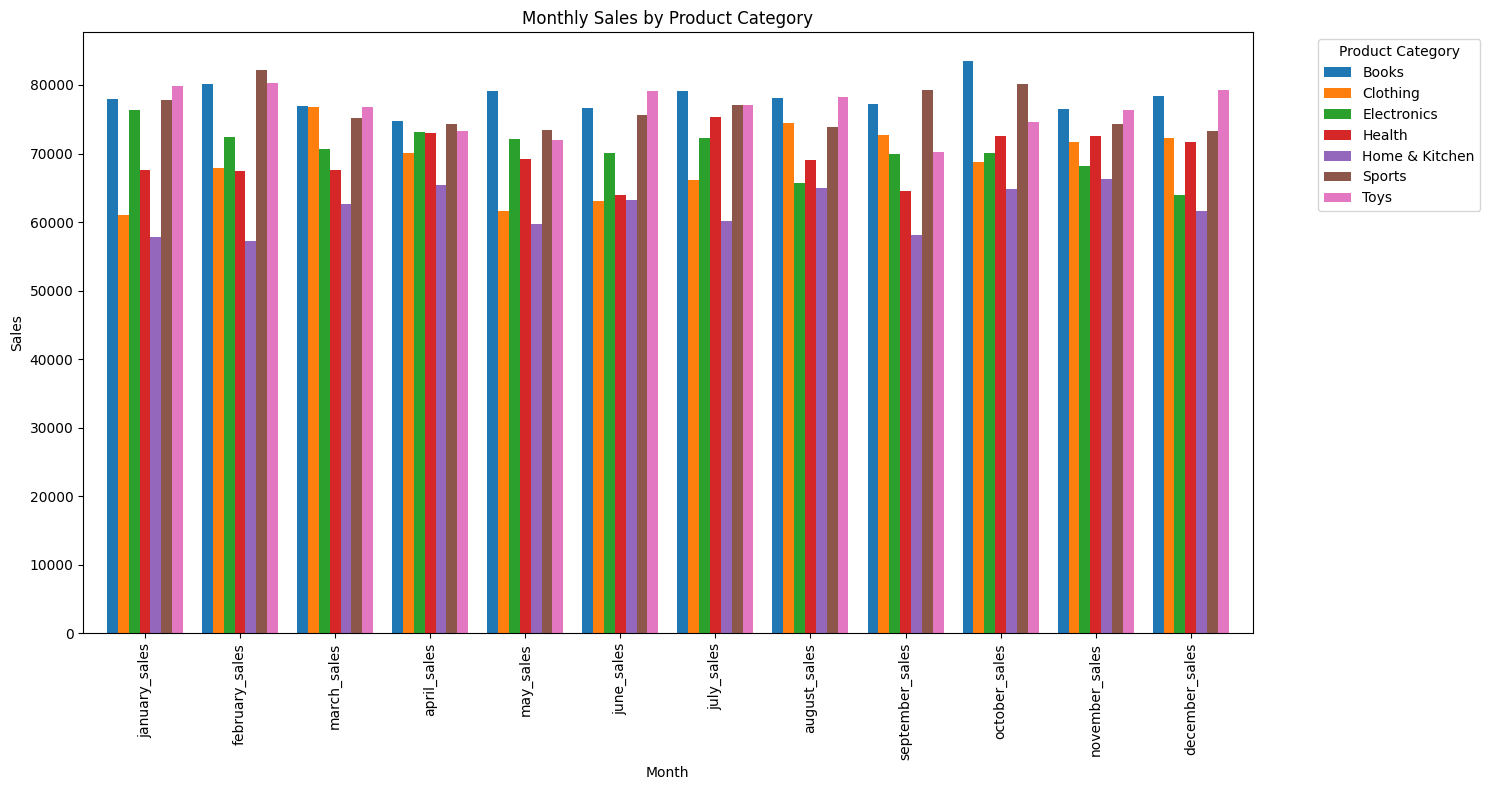

In [59]:
# Set the category as index
monthly_sales.set_index('category', inplace=True)

# Plotting
monthly_sales.T.plot(kind='bar', figsize=(15, 8), width=0.8)

# Add title and labels
plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

Case #2
- The board requested to create a new classification based on the price range of the products in each category. 
 items with price range >350 should be classified as 'Luxury', >150 should be classified as 'Middle', and <150 should be classified as 'Regular'.
- Retrieve how many items belong to each classification for each category.
- Create a graph to visualize the sales according to the new classification for each category.

In [60]:
E_commerce

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


In [61]:
E_commerce.price.min()

np.float64(7.29)

In [62]:
E_commerce.price.max()

np.float64(499.86)

In [63]:
#Using BIN method to assign the new classification
New_class = E_commerce
bins = [0,150,350,float('inf')]
labels = ['Regular','Middle','Luxury']

In [64]:
#Adding the new classification collumn to the data
New_class['classification'] = pd.cut(New_class['price'],bins=bins,labels=labels,right=False)
New_class

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,classification
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,Middle
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,Luxury
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,Luxury
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,Middle
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393,Regular
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474,Luxury
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654,Regular
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394,Luxury


In [65]:
#Re-ordering the column
classification = New_class.pop('classification')
New_class.insert(New_class.columns.get_loc('price') + 1, 'classification', classification)
New_class


,product_id,product_name,category,price,classification,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,Middle,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,Luxury,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,Luxury,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,Middle,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,Regular,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,Regular,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,Luxury,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,Regular,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,Luxury,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


In [66]:
#Counting items for each classification
new_counts = New_class.groupby(['category','classification']).size().unstack(fill_value=0)
new_counts

/var/folders/5m/cy8ky4ms053gq47j9tbh5t3w0000gn/T/ipykernel_2225/4140735988.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_counts = New_class.groupby(['category','classification']).size().unstack(fill_value=0)


classification,Regular,Middle,Luxury
category,,,
Books,45,62,47
Clothing,49,57,34
Electronics,49,49,40
Health,37,57,45
Home & Kitchen,44,48,33
Sports,43,65,45
Toys,46,59,46


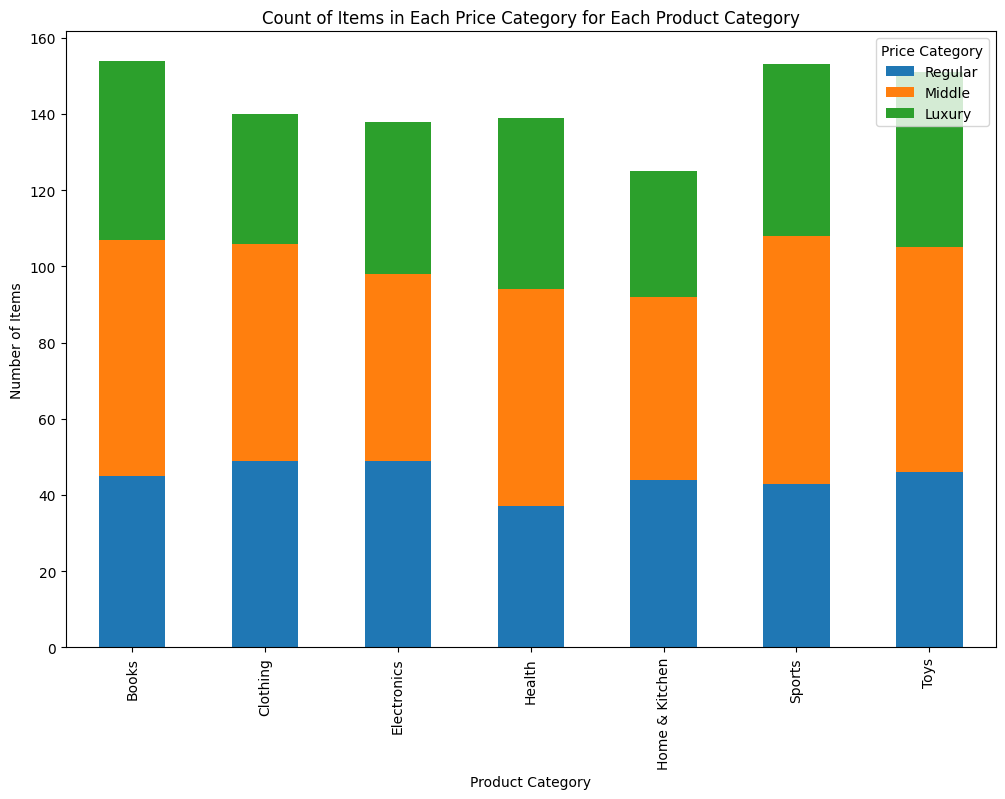

In [67]:
new_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add titles and labels
plt.title('Count of Items in Each Price Category for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Items')
plt.legend(title='Price Category')

# Display the plot
plt.show()

In [68]:
# Preparing for the visualization (sales according to the classification)
sales_columns = [f'sales_month_{i}' for i in range(1, 13)]
#Aggregating the data
aggregated_sales = New_class.groupby(['category', 'classification'])[sales_columns].sum().reset_index()
aggregated_sales



/var/folders/5m/cy8ky4ms053gq47j9tbh5t3w0000gn/T/ipykernel_2225/3095365976.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_sales = New_class.groupby(['category', 'classification'])[sales_columns].sum().reset_index()


,category,classification,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,Books,Regular,24291,23226,21633,20495,20952,23721,21871,25940,22327,22285,20974,22970
1,Books,Middle,28303,32159,30242,33623,31641,31786,32685,29105,33172,35160,33950,31434
2,Books,Luxury,25338,24694,25123,20581,26458,21137,24558,23063,21712,26059,21633,23928
3,Clothing,Regular,23849,21298,28260,24847,21801,24581,23245,28010,27042,26076,27912,24203
4,Clothing,Middle,22764,28306,30364,26288,23168,23092,28451,29334,30068,24383,28185,29381
5,Clothing,Luxury,14353,18307,18172,18953,16674,15450,14409,17078,15565,18347,15586,18734
6,Electronics,Regular,26983,27672,25464,25352,26858,24568,25237,23347,23247,25308,22377,21911
7,Electronics,Middle,28812,24945,24050,25602,26850,26589,27246,24195,26873,22986,26177,23269
8,Electronics,Luxury,20552,19855,21194,22204,18461,18903,19740,18212,19794,21854,19594,18839
9,Health,Regular,18679,18543,17805,20736,19244,18800,19665,18228,17626,17337,19234,20812


In [69]:
#Melting the data
melted_sales = aggregated_sales.melt(id_vars=['category', 'classification'], 
                                     value_vars=sales_columns, 
                                     var_name='month', 
                                     value_name='sales')
melted_sales

,category,classification,month,sales
0,Books,Regular,sales_month_1,24291
1,Books,Middle,sales_month_1,28303
2,Books,Luxury,sales_month_1,25338
3,Clothing,Regular,sales_month_1,23849
4,Clothing,Middle,sales_month_1,22764
...,...,...,...,...
247,Sports,Middle,sales_month_12,30001
248,Sports,Luxury,sales_month_12,23651
249,Toys,Regular,sales_month_12,24563
250,Toys,Middle,sales_month_12,28165


In [70]:
#Converting the value of month column from str type to int type
melted_sales['month'] = melted_sales['month'].str.replace('sales_month_', '').astype(int)
melted_sales
melted_sales.to_csv('melted_data.csv')

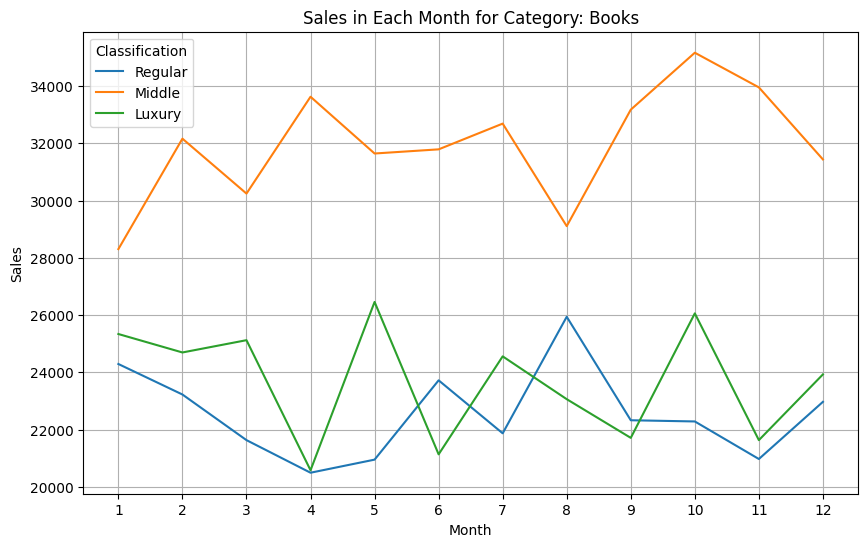

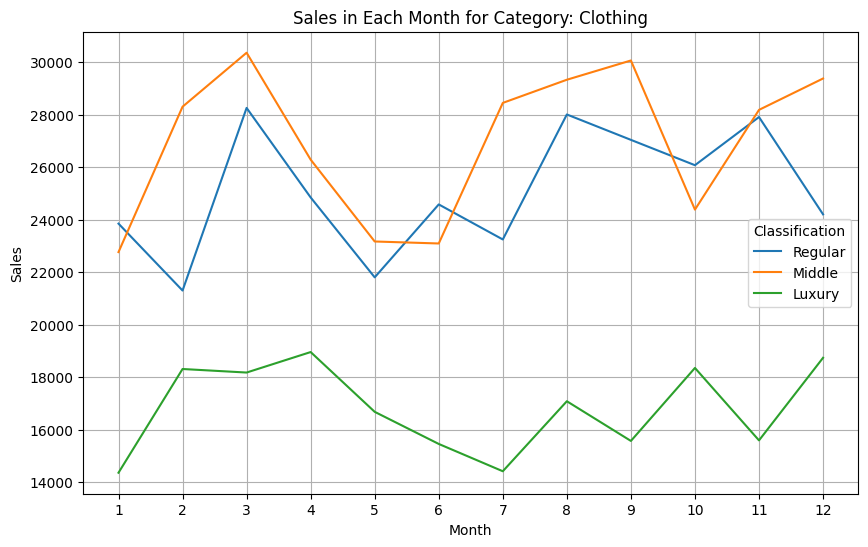

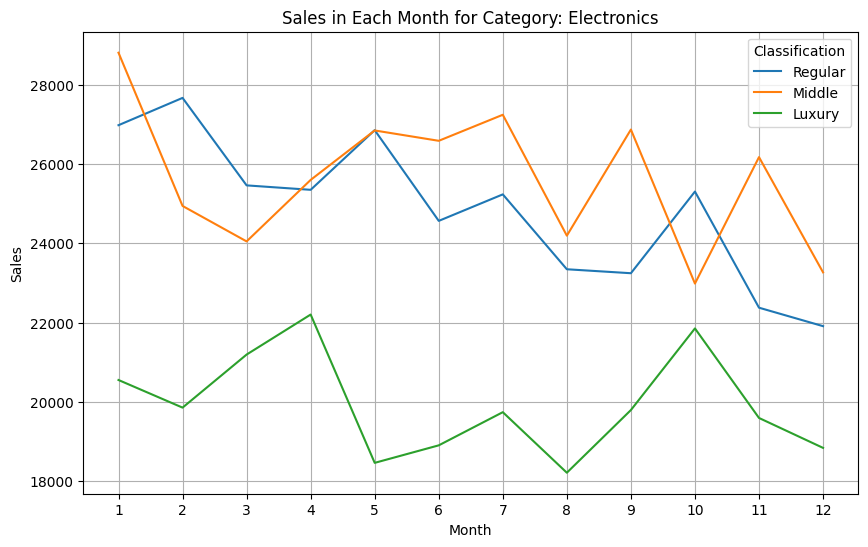

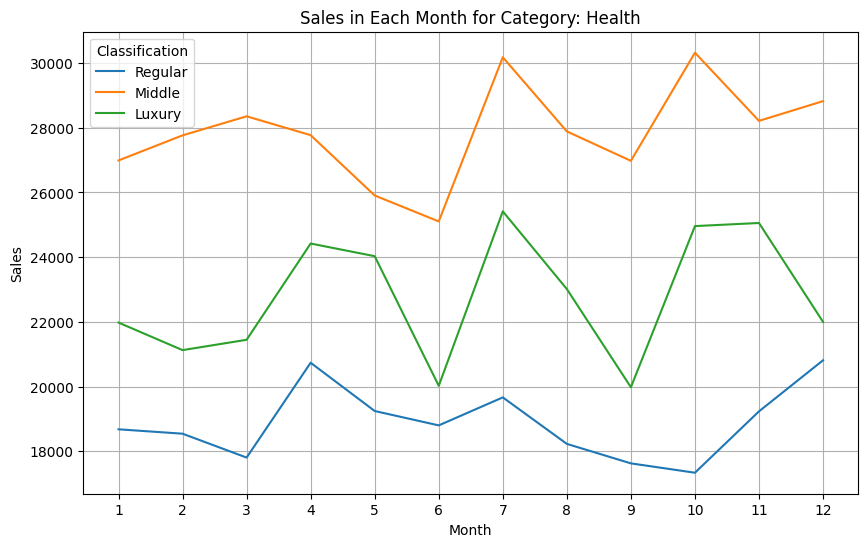

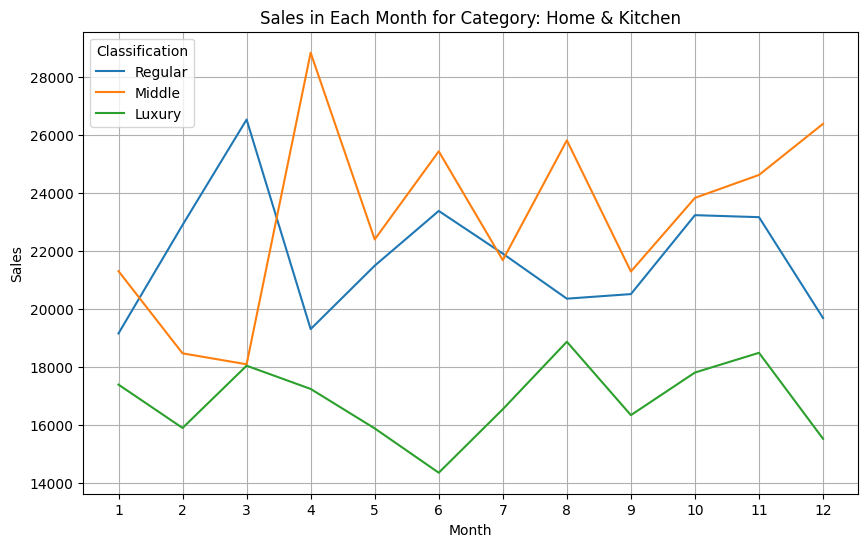

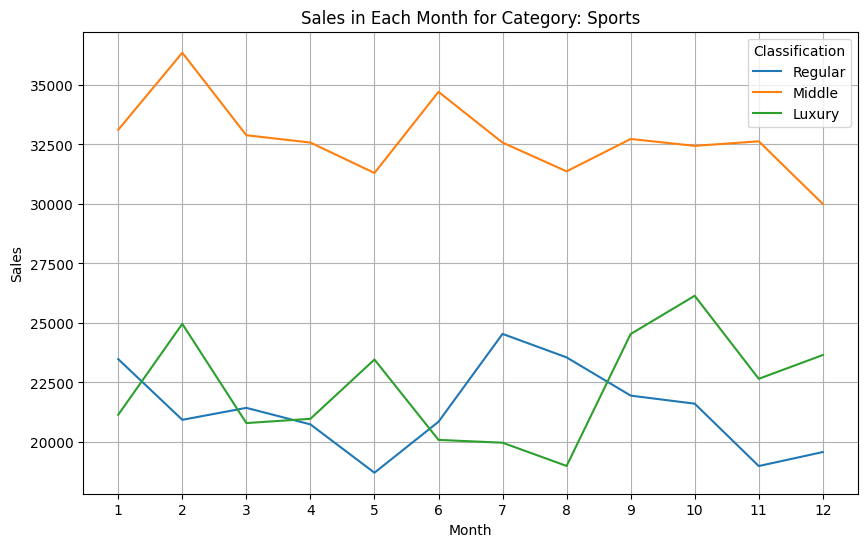

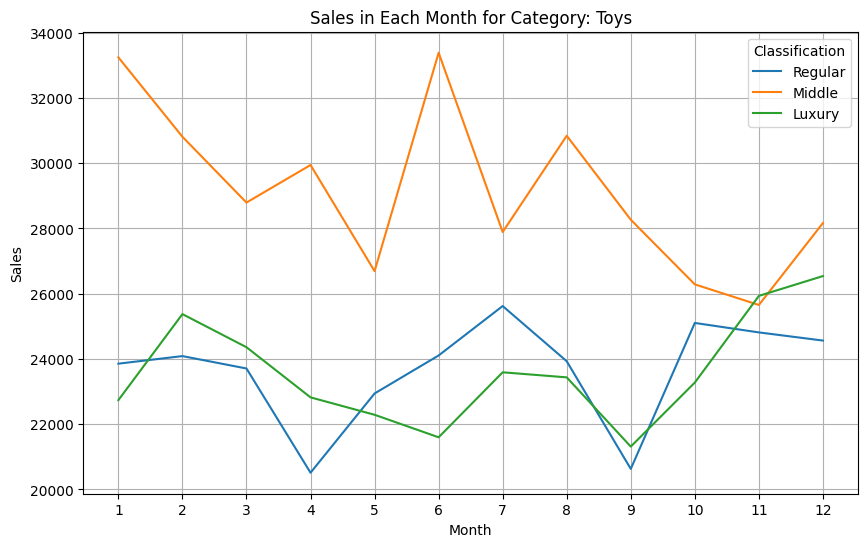

In [71]:
categories = melted_sales['category'].unique()
for category in categories:
    category_data = melted_sales[melted_sales['category'] == category]
    
    plt.figure(figsize=(10, 6))
    for classification in labels:
        subset = category_data[category_data['classification'] == classification]
        
        # Ensure all months are present for each price category
        if not subset.empty:
            plt.plot(subset['month'], subset['sales'], label=classification)
        else:
            # Add a line with zero sales if the subset is empty
            plt.plot(np.arange(1, 13), [0]*12, label=classification)
    
    plt.title(f'Sales in Each Month for Category: {category}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.legend(title='Classification')
    plt.xticks(np.arange(1, 13, step=1))
    plt.grid(True)
    plt.show()

In [72]:
#Separating the table of each category
desired_category = 'Books'

In [73]:
filtered_category = E_commerce[E_commerce['category']==desired_category]

In [74]:
sorted_category = filtered_category.sort_values(by='price', ascending=False)
sorted_category

,product_id,product_name,category,price,classification,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
531,532,Product_532,Books,499.86,Luxury,3.4,162,667,48,734,711,658,950,989,438,588,615,829,303
390,391,Product_391,Books,495.30,Luxury,1.9,507,527,234,510,1000,918,948,681,784,656,177,444,491
69,70,Product_70,Books,493.51,Luxury,2.1,908,909,229,935,736,697,686,833,234,183,479,464,614
661,662,Product_662,Books,493.33,Luxury,3.1,737,960,805,719,15,536,199,920,209,76,276,449,477
499,500,Product_500,Books,493.17,Luxury,4.5,588,276,412,236,303,527,516,566,179,178,912,2,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,238,Product_238,Books,17.04,Regular,2.9,129,535,795,605,640,270,225,298,465,370,928,623,891
925,926,Product_926,Books,16.12,Regular,1.4,487,167,975,964,428,363,162,788,508,327,660,917,414
794,795,Product_795,Books,13.96,Regular,1.2,31,305,536,585,288,333,666,605,788,82,61,307,184
205,206,Product_206,Books,9.55,Regular,4.1,848,849,502,327,244,738,662,981,289,801,680,988,604
